[*********************100%***********************]  1 of 1 completed

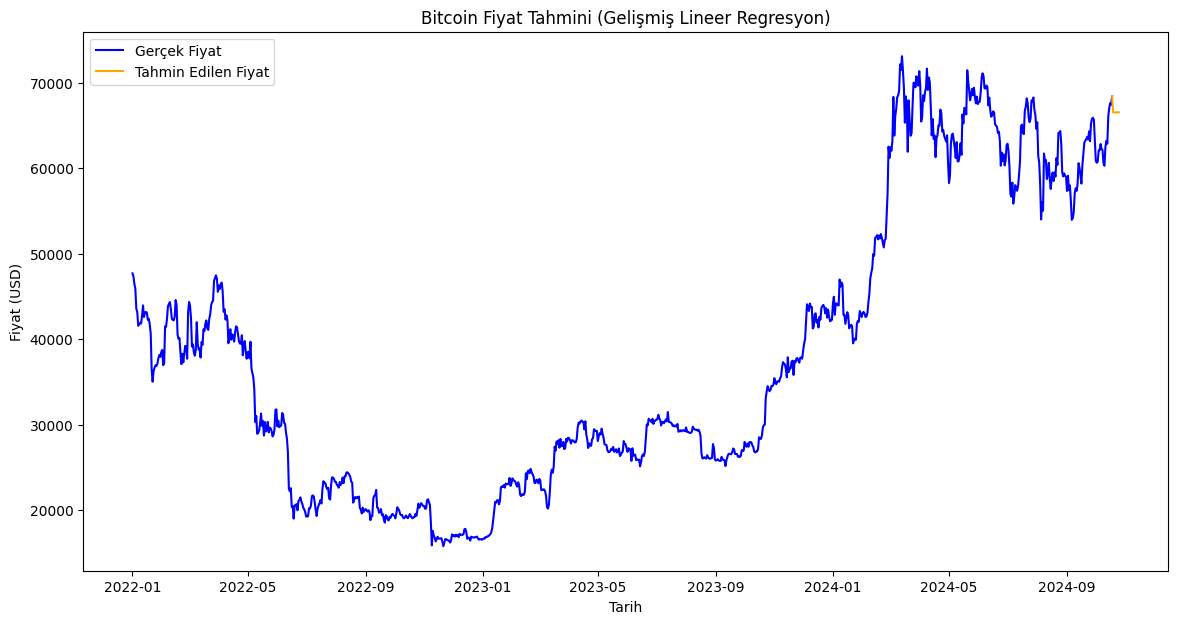

        Date  Predicted Price
0 2024-10-18     68418.789062
1 2024-10-19     66514.698686
2 2024-10-20     66515.509892
3 2024-10-21     66516.321099
4 2024-10-22     66517.132306
5 2024-10-23     66517.943513
6 2024-10-24     66518.754720
7 2024-10-25     66519.565926
Son Gerçek Kapanış Fiyatı: 68418.7890625 USD, Tarih: 2024-10-18


In [2]:
import yfinance as yf  # yfinance kütüphanesini içe aktar
import pandas as pd  # pandas kütüphanesini içe aktar
import numpy as np  # NumPy kütüphanesini içe aktar
from sklearn.linear_model import LinearRegression  # LinearRegression'ı içe aktar
import matplotlib.pyplot as plt  # matplotlib'i içe aktar
from datetime import datetime  # datetime'ı içe aktar

# Bugünün tarihini 'YYYY-MM-DD' formatında al
today = datetime.now().strftime('%Y-%m-%d')

# Bitcoin verilerini Yahoo Finance'dan indir
btc_data = yf.download('BTC-USD', start='2022-01-01', end=today)  # 1 Ocak 2022'den bugüne kadar Bitcoin verilerini al
btc_data['Date'] = btc_data.index  # 'Date' sütununu tarihlerle doldur

# Ek özellikler ekle: Hareketli Ortalama (MA)
btc_data['MA_7'] = btc_data['Close'].rolling(window=7).mean()  # 7 günlük hareketli ortalama
btc_data['MA_30'] = btc_data['Close'].rolling(window=30).mean()  # 30 günlük hareketli ortalama

# NaN değerleri geri doldur
btc_data.bfill(inplace=True)  # NaN değerleri geri doldur

# Tarihleri sayısal bir temsile dönüştür (başlangıç tarihinden itibaren gün sayısı)
btc_data['Days'] = (btc_data['Date'] - btc_data['Date'].min()).dt.days  # İlk tarihten itibaren geçen gün sayısını hesapla

# Özellikleri (X) ve hedef değişkeni (y) tanımla
X = btc_data[['Days', 'MA_7', 'MA_30']]  # 'Days', 'MA_7', ve 'MA_30' özelliklerini seç
y = btc_data['Close']  # 'Close' fiyatını hedef değişken olarak seç

# Lineer regresyon modelini oluştur
model = LinearRegression()  # LinearRegression modelini başlat
model.fit(X, y)  # Verilerle modeli eğit

# Son günün sayısal temsilini al
last_day = btc_data['Days'].max()  # Verisetindeki en yüksek gün sayısını al

# Önümüzdeki 7 gün için tahminler yapmaya hazırlık
future_days = np.array(range(last_day + 1, last_day + 8)).reshape(-1, 1)  # Önümüzdeki 7 gün için bir dizi oluştur
future_ma_7 = np.repeat(btc_data['MA_7'].iloc[-1], 7).reshape(-1, 1)  # Son 7 günlük MA değerini tekrar et
future_ma_30 = np.repeat(btc_data['MA_30'].iloc[-1], 7).reshape(-1, 1)  # Son 30 günlük MA değerini tekrar et

# Gelecek özellikleri bir DataFrame olarak birleştir
future_features = pd.DataFrame({
    'Days': future_days.flatten(),
    'MA_7': future_ma_7.flatten(),
    'MA_30': future_ma_30.flatten()
})

# Model ile tahmin yap
predictions = model.predict(future_features)  # Özelliklere dayalı gelecekteki fiyatları tahmin et

# Son gerçek kapanış fiyatını ve tarihini al
last_close = btc_data['Close'].iloc[-1]  # Verisetinden son kapanış fiyatını al
last_date = btc_data['Date'].iloc[-1]  # Verisetinden son tarihi al

# Tahminler için tarihleri oluştur
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)  # Önümüzdeki 7 gün için tarihler oluştur

# Tahminler listesine son gerçek kapanış fiyatını ekle
predictions_with_last_close = [last_close] + list(predictions)  # Son kapanış fiyatını tahminlerle birleştir
future_dates_with_last_close = pd.date_range(start=last_date, periods=8)  # Son tarihi de içeren tarihler oluştur

# Sonuçları görselleştir
plt.figure(figsize=(14, 7))  # Grafik boyutunu ayarla
plt.plot(btc_data['Date'], y, label='Gerçek Fiyat', color='blue')  # Gerçek fiyatları mavi ile çiz
plt.plot(future_dates_with_last_close, predictions_with_last_close, label='Tahmin Edilen Fiyat', color='orange')  # Tahmin edilen fiyatları turuncu ile çiz
plt.title('Bitcoin Fiyat Tahmini (Gelişmiş Lineer Regresyon)')  # Grafiğin başlığını ayarla
plt.xlabel('Tarih')  # X ekseni için etiket
plt.ylabel('Fiyat (USD)')  # Y ekseni için etiket
plt.legend()  # Legend'ı göster
plt.show()  # Grafiği göster

# Tahmin edilen fiyatları bir DataFrame olarak yazdır
predicted_prices = pd.DataFrame({'Date': future_dates_with_last_close, 'Predicted Price': predictions_with_last_close})  # Tahmin edilen fiyatlar için DataFrame oluştur
print(predicted_prices)  # Tahmin edilen fiyatları göster

# Son gerçek kapanış fiyatını ve tarihini yazdır
print(f"Son Gerçek Kapanış Fiyatı: {last_close} USD, Tarih: {last_date.date()}")
